# Movie Ratings Analysis

In this analysis we are focusing on analyzing and visualizing audience and critic ratings of some popular movies released between 2007-2011.

Some of the major analysis performed are as follows:

- Bi-variate analysis between the critic & audience ratings
- Bi-variate analysis between rating (critic/audience) & budget involved
- Variation of ratings by movie genre
- Rating trends over the year

## Exploring Dataset

Let's explore the dataset that we have to understand the variables in a better way.

### Importing Libraries & Settings

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,5

import seaborn as sns
sns.set_theme()

### Importing Data

In [2]:
movies = pd.read_csv("../01_DATA/movie_ratings_data.csv", index_col=None)
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (Mn $),Release Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


### Data Profiling

#### Viewing the shape of data

In [3]:
movies.shape

(559, 6)

#### Viewing the metadata info

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Film                       559 non-null    object
 1   Genre                      559 non-null    object
 2   Rotten Tomatoes Ratings %  559 non-null    int64 
 3   Audience Ratings %         559 non-null    int64 
 4   Budget (Mn $)              559 non-null    int64 
 5   Release Year               559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


#### Fixing Data Types

We can optimize the memory usage by converting the `object` datatype into `category` datatype and also, we can convert the datatype of `Release Year` field from `int64` to `category` as the later makes more sense.

In [5]:
# Changing the datatype from "object" to "category"

movies["Film"] = movies["Film"].astype('category')
movies["Genre"] = movies["Genre"].astype('category')

# Changing the datatype of "Release Year" from "Int64" to "Category"

movies["Release Year"] = movies["Release Year"].astype('category')

# Viewing the metadata info after datatype changes

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Film                       559 non-null    category
 1   Genre                      559 non-null    category
 2   Rotten Tomatoes Ratings %  559 non-null    int64   
 3   Audience Ratings %         559 non-null    int64   
 4   Budget (Mn $)              559 non-null    int64   
 5   Release Year               559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


#### Checking details of numerical columns:

In [6]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rotten Tomatoes Ratings %,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
Audience Ratings %,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
Budget (Mn $),559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


#### Viewing the distribution of `Rotten Tomatoes Ratings %`, `Audience Ratings %` & `Budget (Mn $)`

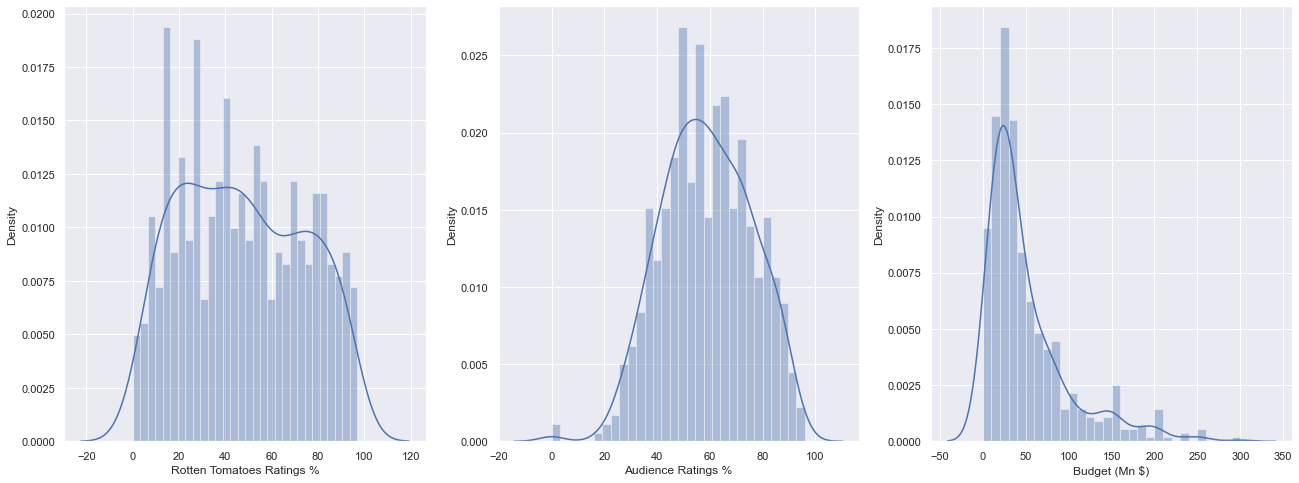

In [7]:
f, axes = plt.subplots(1,3, figsize=(22,8))

critic_rating_dist = sns.distplot(movies["Rotten Tomatoes Ratings %"], bins=30, ax=axes[0])
audience_rating_dist = sns.distplot(movies["Audience Ratings %"], bins=30, ax=axes[1])
budget_dist = sns.distplot(movies["Budget (Mn $)"], bins=30, ax=axes[2])

#### List of unique release years

In [8]:
list(movies["Release Year"].unique().sort_values())

[2007, 2008, 2009, 2010, 2011]

#### Count of Movies by Release Year

In [9]:
grouped_data = movies.groupby("Release Year")["Release Year"].count()
grouped_data

Release Year
2007     79
2008    122
2009    116
2010    119
2011    123
Name: Release Year, dtype: int64

#### Visualizing the Number of Movies by Release Year

We can visualize the `grouped data` as follows:

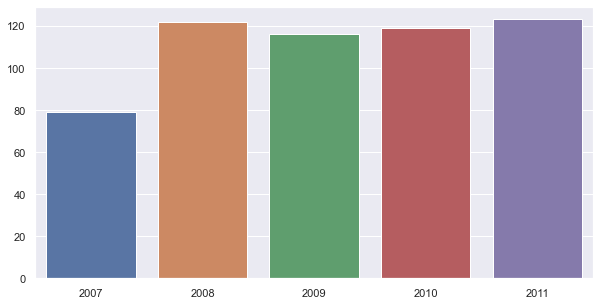

In [10]:
x_axis = list(grouped_data.index)
y_axis = list(grouped_data)

films_by_year = sns.barplot(x=x_axis, y=y_axis)

### Filtering the DataFrame

We can slice the dataframe to view a certain player's data on a particular year.

#### Viewing the Top-10 Movies by Budget

In [11]:
movies[["Film", "Budget (Mn $)"]].nlargest(10,"Budget (Mn $)")

,Film,Budget (Mn $)
304,Pirates of the Caribbean: At World's End,300
360,Spider-Man 3,258
167,Harry Potter and the Half-Blood Prince,250
303,Pirates of the Caribbean: On Stranger Tides,250
33,Avatar,237
314,Quantum of Solace,230
501,Transformers: Revenge of the Fallen,210
5,2012,200
19,Alice in Wonderland,200
152,Green Lantern,200


#### Viewing the Top-10 Movies by Rotten Tomatoes Ratings

In [12]:
movies[["Film", "Rotten Tomatoes Ratings %"]].nlargest(10,"Rotten Tomatoes Ratings %")

,Film,Rotten Tomatoes Ratings %
387,The Artist,97
431,The Hurt Locker,97
455,The Muppets,97
506,True Grit,96
249,Moneyball,95
275,No Country for Old Men,95
26,An Education,94
196,Iron Man,94
207,Juno,94
362,Star Trek,94


#### Viewing the Top-10 Movies by Audience Ratings

In [13]:
movies[["Film", "Audience Ratings %"]].nlargest(10,"Audience Ratings %")

,Film,Audience Ratings %
406,The Dark Knight,96
9,50/50,93
190,Inception,93
530,Warrior,93
33,Avatar,92
196,Iron Man,91
362,Star Trek,91
387,The Artist,91
394,The Bourne Ultimatum,91
428,The Help,91


#### Viewing Movie Details of Inception

In [14]:
film_name = "Inception"

film_filter = movies["Film"] == film_name

filtered_data = movies[film_filter]

filtered_data.iloc[0]

Film                         Inception
Genre                           Action
Rotten Tomatoes Ratings %           86
Audience Ratings %                  93
Budget (Mn $)                      160
Release Year                      2010
Name: 190, dtype: object

### Creating a function to filter the dataframe

In [15]:
def movie_details(film_name: str):
    """
    This function takes name of the movie as an input and shows all its related info as output
    """
    
    film_filter = movies["Film"] == film_name
    filtered_data = movies[film_filter]
    return filtered_data.iloc[0]

#### Viewing Movie Details of Spider-Man 3

In [16]:
movie_details("Spider-Man 3")

Film                         Spider-Man 3
Genre                              Action
Rotten Tomatoes Ratings %              61
Audience Ratings %                     54
Budget (Mn $)                         258
Release Year                         2007
Name: 360, dtype: object

## Analyzing Data

Visualizing the dataset provides a better way to analyze the data and we can leverage the `seaborn` library to effectively visualize the data to get valuable insights

#### Analyzing Budget Distribution for Movies with Drama Genre

The following visual shows the budget distribution of movies from 'Drama' genre:

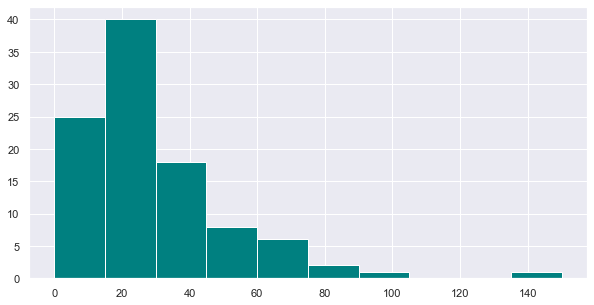

In [17]:
drama_genre_data = movies[movies["Genre"] == "Drama"]

plt.hist(drama_genre_data["Budget (Mn $)"], color="teal")
plt.show()

##### 💡 Insight
- The movie budget for "Drama" genre is right-skewed and most of the movies made within a 60 Mn$

#### Analyzing Budget Distribution for Movies with Drama  & Action Genre

The following visual compares the budget distribution of movies from 'Drama'  & 'Action' genre:

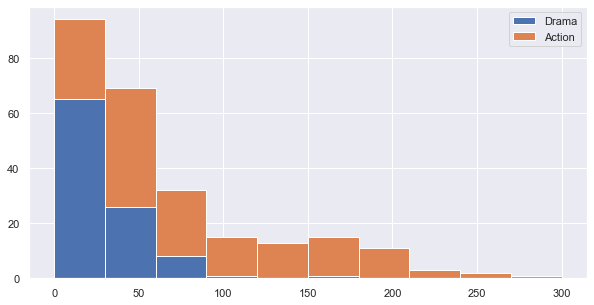

In [18]:
drama_genre_data = movies[movies["Genre"] == "Drama"]
action_genre_data = movies[movies["Genre"] == "Action"]

data_list = [drama_genre_data["Budget (Mn $)"], action_genre_data["Budget (Mn $)"]]
labels_list = ["Drama", "Action"]

plt.hist(data_list, stacked=True, label=labels_list)
plt.legend()
plt.show()

##### 💡 Insight
- Although movies from either genre is right-skewed still we can see a nice chunk of action movies beyond 100 Mn$ budget.

#### Analyzing Budget Distribution for Movies stacked by Genres

The following visual compares the budget distribution of movies from all the genre:

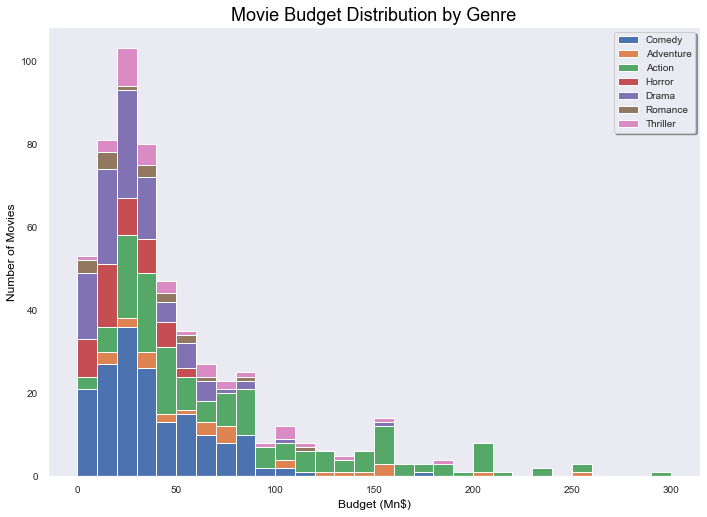

In [19]:
sns.set_style('dark')

genre_list = []
genre_labels = []

for genre in list(movies["Genre"].unique()):
    genre_data = movies[movies["Genre"] == genre]
    genre_list.append(genre_data["Budget (Mn $)"])
    genre_labels.append(genre)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
    
plt.hist(genre_list, stacked=True, bins=30, label=genre_labels)

plt.legend(frameon=True, fancybox=True, shadow=True, framealpha=1, prop={'size': 10})
plt.title('Movie Budget Distribution by Genre', fontsize=18, color='Black')

plt.ylabel('Number of Movies', fontsize=12, color='Black')
plt.xlabel('Budget (Mn$)', fontsize=12, color='Black')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

##### 💡 Insight
- Irrespective of genre; the budget of movies are right-skewed
- We can clearly see that action and adventure genre movies are usually high budgeted whereas, horror genre movies falls below 100 Mn$

#### Analyzing Critic Ratings for Movies by Genres

The following visual shows the critic ratings distribution of movies by genre:

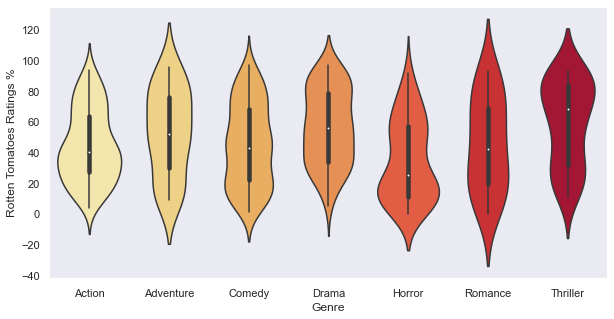

In [20]:
violins = sns.violinplot(data=movies, x="Genre", y="Rotten Tomatoes Ratings %", palette='YlOrRd')

##### 💡 Insight

- The critic ratings in horror genre is relatively lower as compared to other genres.
- Thriller genre has a higher median value for critic rating as compared to other genres.
- Violin plots helps in visualizing the distribution and we can see a relatively uniform critic rating distribution for movies with romantic genre.

#### Analyzing Correlation Between `Rotten Tomatoes Ratings %` and `Audience Ratings %`

The below join plot shows the correlation and distribution of `Rotten Tomatoes Ratings%` and `Audience Ratings%`

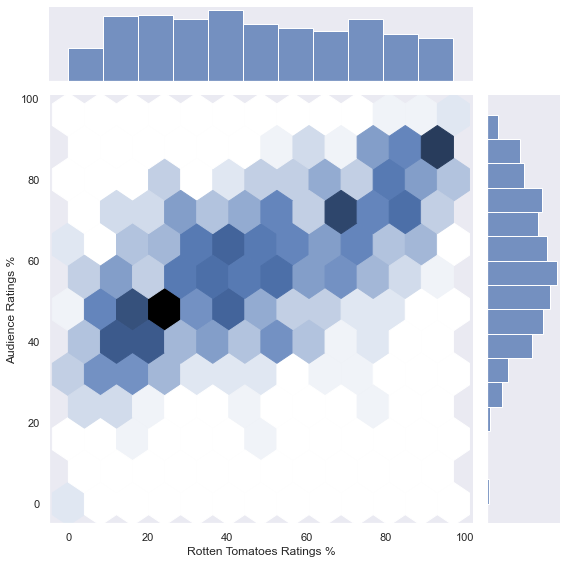

In [21]:
joint_plt = sns.jointplot(
    data=movies, x="Rotten Tomatoes Ratings %", y="Audience Ratings %", 
    height=8, kind="hex")

##### 💡 Insight
- The audience rating distributed normally across the movies whereas, the critic rating is more or, less uniform
- The darker color of hexagons indicates high density of movies
- At an overall level; the audience are critic ratings are directly proportional to each other

#### Analyzing `Rotten Tomatoes Ratings %` Vs. `Audience Ratings %` by Genre & Movie Release Years

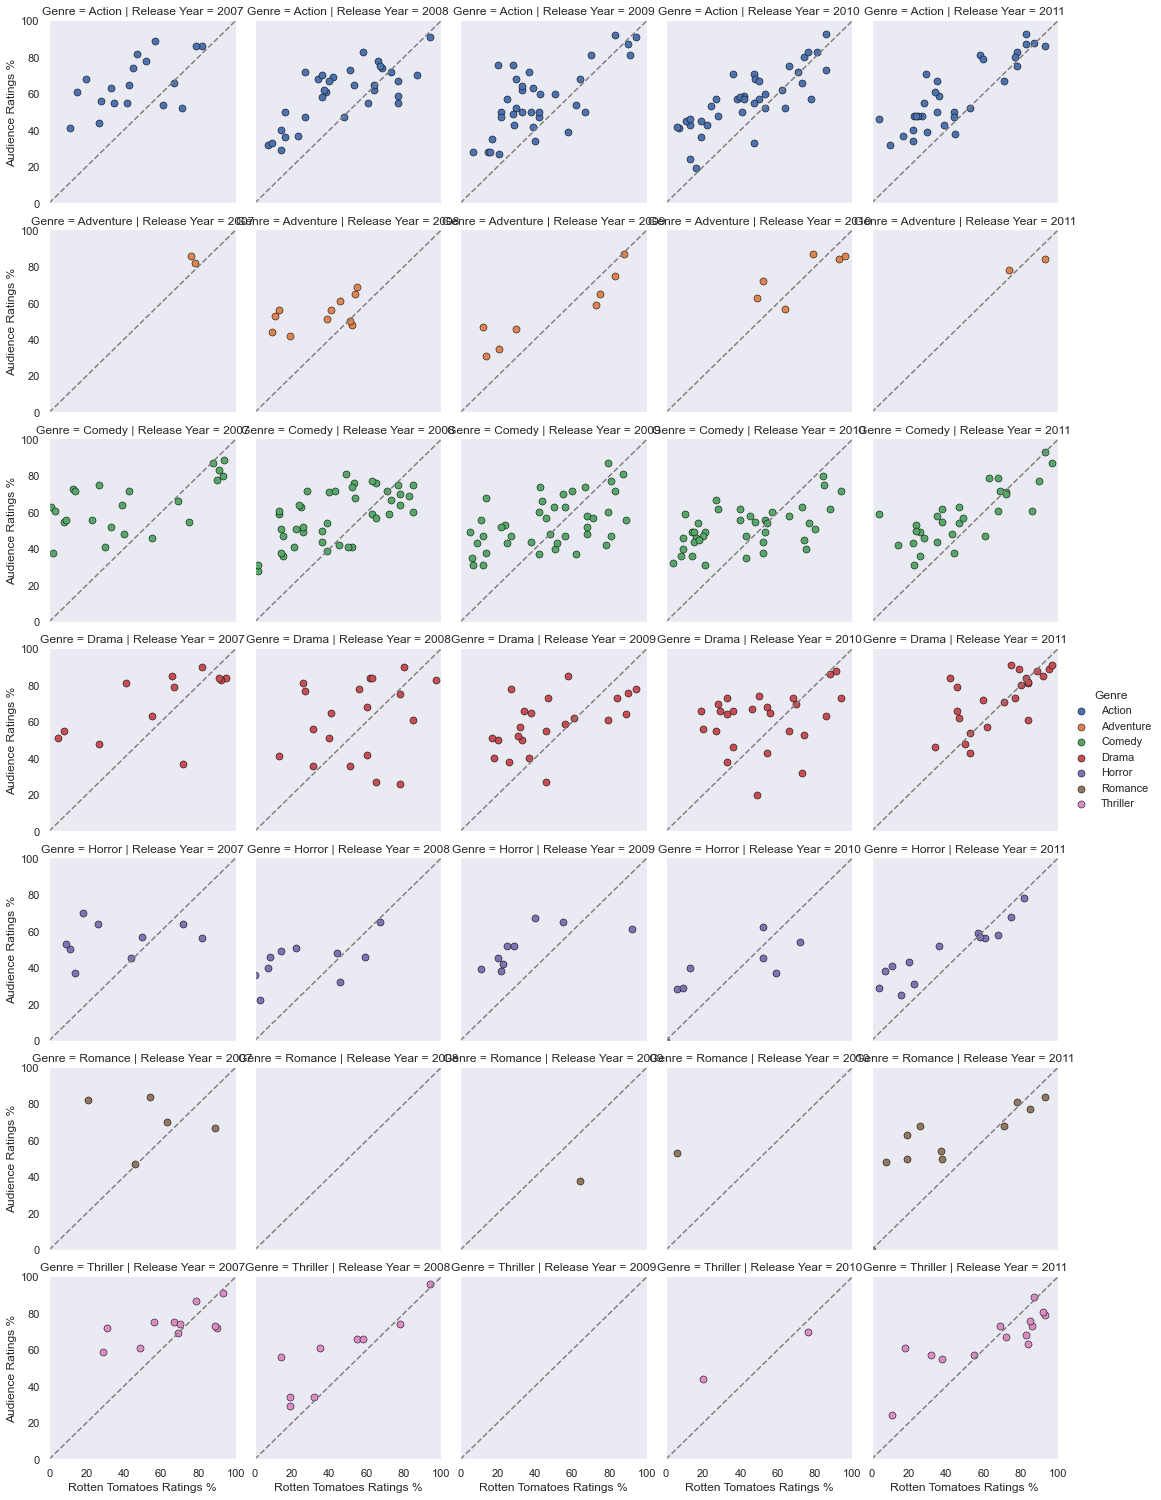

In [22]:
facet_grid = sns.FacetGrid(movies, row='Genre', col='Release Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')

facet_grid = facet_grid.map(plt.scatter, 'Rotten Tomatoes Ratings %', 'Audience Ratings %', **kws)

# Setting axes limits

facet_grid.set(xlim=(0,100), ylim=(0,100))

# Adding diagonal Line

for ax in facet_grid.axes.flat:
    ax.plot((0,100), (0,100), c='gray', ls='--')

# Adding Legends

facet_grid.add_legend()
plt.show()

##### 💡 Insight

- By the end of 2011; the action movie points splits into two clusters but, in both, the high audience rating remains high.
- There were not much of adventure movies released between 2009-11; however, nearly half of the movies are rated high by audience over the year.
- Movies from comedy & romance genre also gets higher audience rating over the years.
- Drama movies were bit scatted in terms of ratings but, by the end of 2011; we can see a uptrend in critic and audience rating.
- Horror movies are rated less as compared to other genre over the years both by critic and audience.
- By the end of 2011; we can see a bunch of movies rated highly by critics.

#### Bi-variate Analysis with Kernel Density Estimate (KDE) Distibution

##### `Rotten Tomatoes Ratings %` Vs. `Audience Ratings %`

The following KDE plot shows the correlation between `Rotten Tomatoes Ratings %` and `Audience Ratings %` along with the concentration of movies

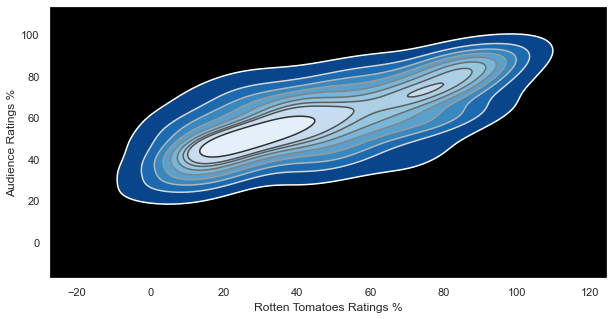

In [23]:
sns.set_style('dark', {'axes.facecolor': 'black'})

critic_vs_audience_rating = sns.kdeplot(
    x=movies["Rotten Tomatoes Ratings %"], y=movies["Audience Ratings %"], 
    shade=True, shade_lowest=False, cmap="Blues_r")

critic_vs_audience_rating_contour = sns.kdeplot(
    x=movies["Rotten Tomatoes Ratings %"], y=movies["Audience Ratings %"], 
    cmap="gist_gray_r")

##### 💡 Insight

We can observer that when the critic rating is between 20 to 80; the audience rating also varies between 20 to 80. 

_For example: when the critic rating is 60 for a certain movie; the audience rating may vary from 25-85._

However; the equation changes as we move towards the extremes, i.e., the curve become steeper near the ends and the variation between ratings decreases.

##### Ratings Vs. Budget Distribution

The following KDE plots shows & compares the correlation between budget and the two types of movie ratings and also shows the concetration of movies.

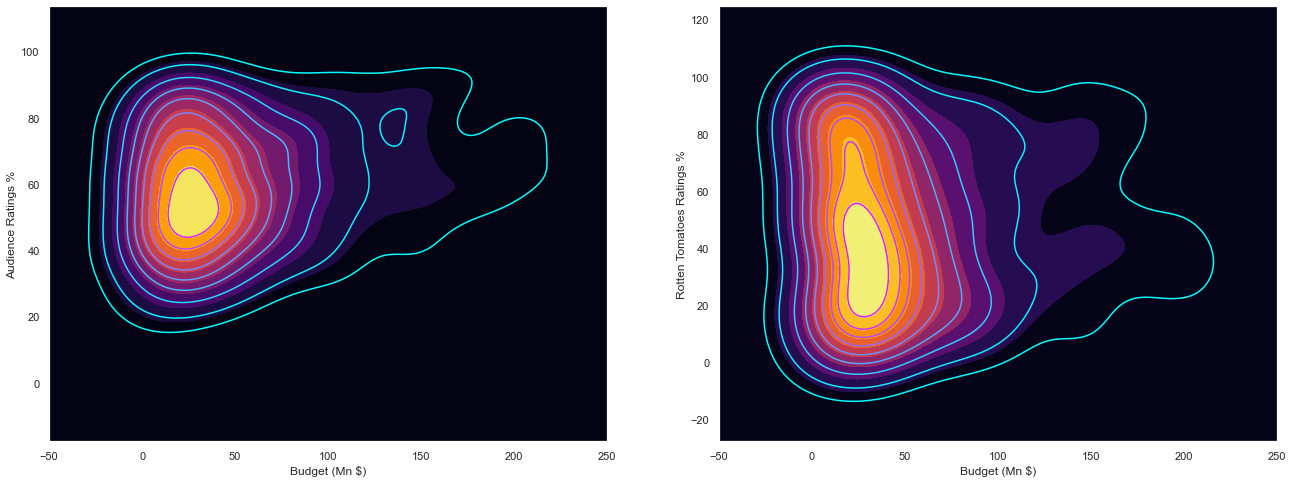

In [25]:
sns.set_style('dark', {'axes.facecolor': 'black'})
f, axes = plt.subplots(1,2, figsize=(22,8), sharex=True, sharey=False)

# Plot-1

budget_vs_audience_rating = sns.kdeplot(
    x=movies["Budget (Mn $)"], y=movies["Audience Ratings %"], 
    shade=True, shade_lowest=True, cmap='inferno',
    ax=axes[0])

budget_vs_audience_rating_contour = sns.kdeplot(
    x=movies["Budget (Mn $)"], y=movies["Audience Ratings %"], 
    cmap='cool',ax=axes[0])

# plot-2

budget_vs_critic_rating = sns.kdeplot(
    x=movies["Budget (Mn $)"], y=movies["Rotten Tomatoes Ratings %"], 
    shade=True, shade_lowest=True, cmap='inferno',
    ax=axes[1])

budget_vs_critic_rating_contour = sns.kdeplot(
    x=movies["Budget (Mn $)"], y=movies["Rotten Tomatoes Ratings %"], 
    cmap='cool', ax=axes[1])

# Setting axes limits

budget_vs_audience_rating.set(xlim = (-50,250))
plt.show()

##### 💡 Insight
- We can see a large variation in ratings for any budget range, however, when budget is somewhere around 25-30 Mn$; the rating variations is comparatively lesser.